In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pyannote.core import Segment, Timeline, Annotation, notebook

In [3]:
notebook.reset()

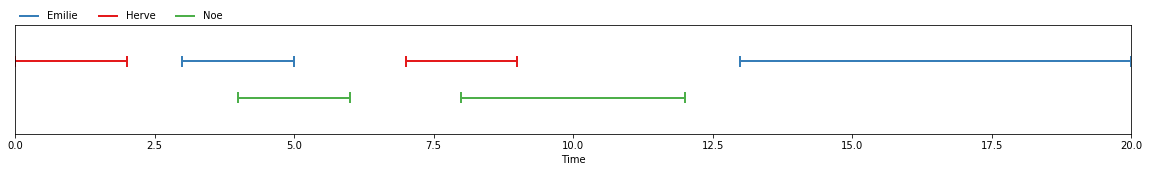

In [4]:
reference = Annotation()
reference[Segment(0, 2)] = 'Herve'
reference[Segment(3, 5)] = 'Emilie'
reference[Segment(4, 6)] = 'Noe'
reference[Segment(7, 9)] = 'Herve'
reference[Segment(8, 12)] = 'Noe'
reference[Segment(13, 20)] = 'Emilie'
reference

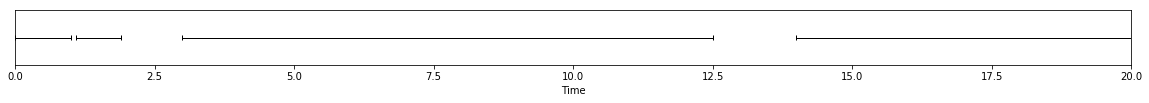

In [5]:
detection = Annotation()
detection[Segment(0, 1)] = 'speech'
detection[Segment(1.1, 1.9)] = 'speech'
detection[Segment(3, 12.5)] = 'speech'
detection[Segment(14, 20)] = 'speech'
detection.get_timeline()

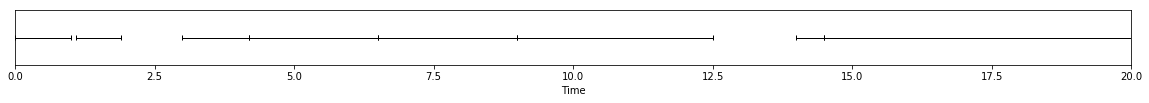

In [6]:
segmentation = Annotation()
segmentation[Segment(0, 1)] = 0
segmentation[Segment(1.1, 1.9)] = 1
segmentation[Segment(3, 4.2)] = 2
segmentation[Segment(4.2, 6.5)] = 3
segmentation[Segment(6.5, 9)] = 4
segmentation[Segment(9, 12.5)] = 5
segmentation[Segment(14, 14.5)] = 6
segmentation[Segment(14.5, 20)] = 7
segmentation.get_timeline()

In [7]:
notebook.reset()

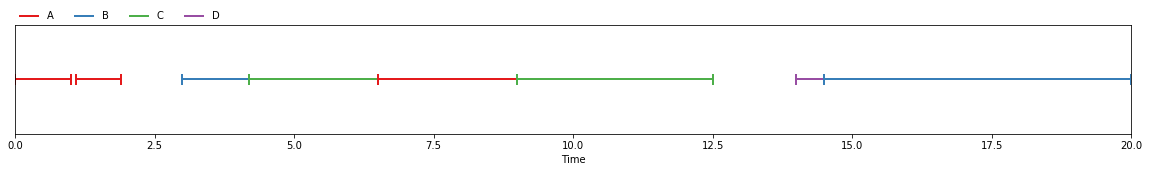

In [8]:
diarization = Annotation()
diarization[Segment(0, 1)] = 'A'
diarization[Segment(1.1, 1.9)] = 'A'
diarization[Segment(3, 4.2)] = 'B'
diarization[Segment(4.2, 6.5)] = 'C'
diarization[Segment(6.5, 9)] = 'A'
diarization[Segment(9, 12.5)] = 'C'
diarization[Segment(14, 14.5)] = 'D'
diarization[Segment(14.5, 20)] = 'B'
diarization

In [9]:
notebook.reset()

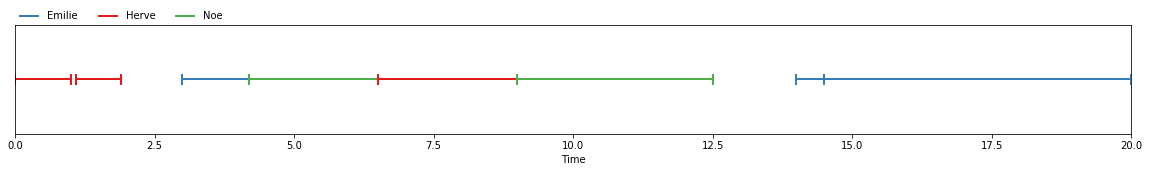

In [10]:
identification = Annotation()
identification[Segment(0, 1)] = 'Herve'
identification[Segment(1.1, 1.9)] = 'Herve'
identification[Segment(3, 4.2)] = 'Emilie'
identification[Segment(4.2, 6.5)] = 'Noe'
identification[Segment(6.5, 9)] = 'Herve'
identification[Segment(9, 12.5)] = 'Noe'
identification[Segment(14, 14.5)] = 'Emilie'
identification[Segment(14.5, 20)] = 'Emilie'
identification

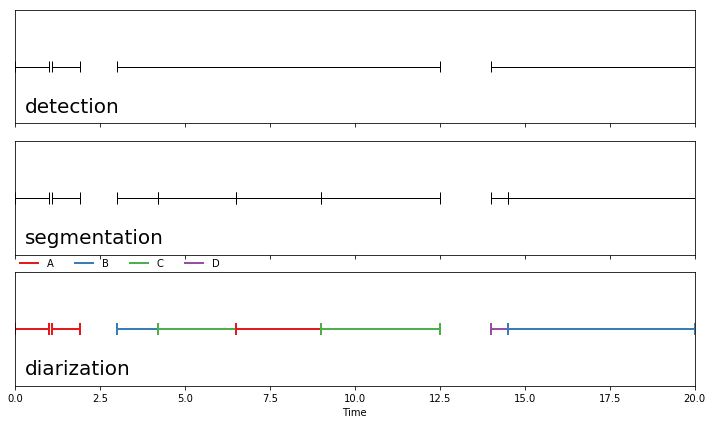

In [11]:
figsize(10, 6)
#subplot(411)
#notebook.reset()
#notebook.plot_annotation(reference, time=False);
#gca().text(0.3, 0.1, 'reference', fontsize=20)
subplot(311)
notebook.plot_timeline(detection.get_timeline(), time=False)
gca().text(0.3, 0.1, 'detection', fontsize=20)
subplot(312)
notebook.plot_timeline(segmentation.get_timeline(), time=False)
gca().text(0.3, 0.1, 'segmentation', fontsize=20)
subplot(313)
notebook.reset()
notebook.plot_annotation(diarization, time=True, legend=True)
gca().text(0.3, 0.1, 'diarization', fontsize=20)
#subplot(515)
#notebook.reset()
#notebook.plot_annotation(identification, time=True, legend=True)
#gca().text(0.3, 0.1, 'identification', fontsize=20)
tight_layout()
savefig('../figures/visualization.pdf')

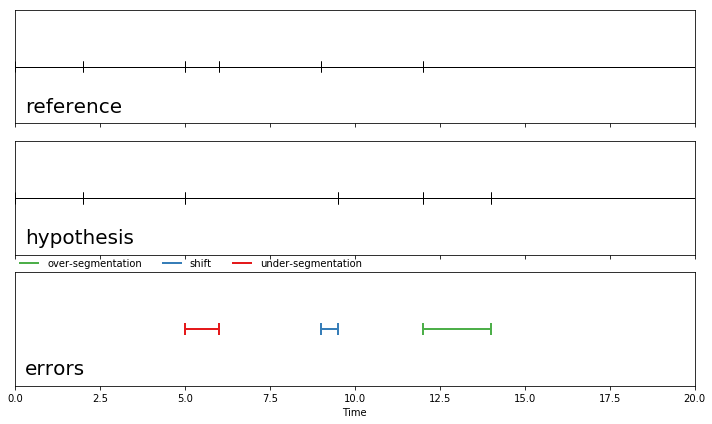

In [12]:
reference2 = Annotation()
reference2[Segment(0, 2)] = 'Herve'
reference2[Segment(2, 5)] = 'Emilie'
reference2[Segment(5, 6)] = 'Noe'
reference2[Segment(6, 9)] = 'Herve'
reference2[Segment(9, 12)] = 'Noe'
reference2[Segment(12, 20)] = 'Emilie'

hypothesis2 = Annotation()
hypothesis2[Segment(0, 2)] = 'Herve'
hypothesis2[Segment(2, 5)] = 'Emilie'
hypothesis2[Segment(5, 9.5)] = 'Noe'
hypothesis2[Segment(9.5, 12)] = 'Noe'
hypothesis2[Segment(12, 14)] = 'Emilie'
hypothesis2[Segment(14, 20)] = 'Hervé'


figsize(10, 6)
subplot(311)
notebook.reset()
notebook.plot_timeline(reference2.get_timeline(), time=False);
gca().text(0.3, 0.1, 'reference', fontsize=20)
subplot(312)
notebook.plot_timeline(hypothesis2.get_timeline(), time=False)
gca().text(0.3, 0.1, 'hypothesis', fontsize=20)
subplot(313)
notebook.reset()
notebook.crop = Segment(0, 20)
from pyannote.metrics.errors.segmentation import SegmentationErrorAnalysis
sea = SegmentationErrorAnalysis()
notebook.plot_annotation(sea(reference2, hypothesis2).subset(['correct'], invert=True), time=True, legend=True)
gca().text(0.3, 0.1, 'errors', fontsize=20)
tight_layout()
savefig('../figures/segmentation_error.pdf')